In [786]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [787]:
df = pd.read_csv('Airline Passenger Satisfaction.csv')
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


### Context 
This dataset contains an airline passenger satisfaction survey. What factors are highly correlated to a satisfied (or dissatisfied) passenger? Can you predict passenger satisfaction? level(Satisfaction, neutral or dissatisfaction)

### Content
Gender: Gender of the passengers (Female, Male)

Customer Type: The customer type (Loyal customer, disloyal customer)

Age: The actual age of the passengers

Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

Flight distance: The flight distance of this journey

Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

Ease of Online booking: Satisfaction level of online booking

Gate location: Satisfaction level of Gate location

Food and drink: Satisfaction level of Food and drink

Online boarding: Satisfaction level of online boarding

Seat comfort: Satisfaction level of Seat comfort

Inflight entertainment: Satisfaction level of inflight entertainment

On-board service: Satisfaction level of On-board service

Leg room service: Satisfaction level of Leg room service

Baggage handling: Satisfaction level of baggage handling

Check-in service: Satisfaction level of Check-in service

Inflight service: Satisfaction level of inflight service

Cleanliness: Satisfaction level of Cleanliness

Departure Delay in Minutes: Minutes delayed when departure

Arrival Delay in Minutes: Minutes delayed when Arrival

Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

In [790]:
df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [791]:
df.dtypes

Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

In [792]:
df.duplicated().sum()

0

In [793]:
df.drop(columns = ['Unnamed: 0','id'],inplace=True)
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [794]:
df.isna().sum() / len(df) *100

Gender                               0.000000
Customer Type                        0.000000
Age                                  0.000000
Type of Travel                       0.000000
Class                                0.000000
Flight Distance                      0.000000
Inflight wifi service                0.000000
Departure/Arrival time convenient    0.000000
Ease of Online booking               0.000000
Gate location                        0.000000
Food and drink                       0.000000
Online boarding                      0.000000
Seat comfort                         0.000000
Inflight entertainment               0.000000
On-board service                     0.000000
Leg room service                     0.000000
Baggage handling                     0.000000
Checkin service                      0.000000
Inflight service                     0.000000
Cleanliness                          0.000000
Departure Delay in Minutes           0.000000
Arrival Delay in Minutes          

In [795]:
df.dropna(inplace=True)
df.isna().sum() / len(df) *100

Gender                               0.0
Customer Type                        0.0
Age                                  0.0
Type of Travel                       0.0
Class                                0.0
Flight Distance                      0.0
Inflight wifi service                0.0
Departure/Arrival time convenient    0.0
Ease of Online booking               0.0
Gate location                        0.0
Food and drink                       0.0
Online boarding                      0.0
Seat comfort                         0.0
Inflight entertainment               0.0
On-board service                     0.0
Leg room service                     0.0
Baggage handling                     0.0
Checkin service                      0.0
Inflight service                     0.0
Cleanliness                          0.0
Departure Delay in Minutes           0.0
Arrival Delay in Minutes             0.0
satisfaction                         0.0
dtype: float64

In [796]:
rating_col = ['Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']
category_col = ['Gender', 'Customer Type','Type of Travel','Class','satisfaction']
rating_values = {0:'Very Bad',1:'Bad',2:'Normal',3:'Good',4:'Very Good',5:'Excellent'}


In [797]:
df[category_col] = df[category_col].astype('category')
df.dtypes

Gender                               category
Customer Type                        category
Age                                     int64
Type of Travel                       category
Class                                category
Flight Distance                         int64
Inflight wifi service                   int64
Departure/Arrival time convenient       int64
Ease of Online booking                  int64
Gate location                           int64
Food and drink                          int64
Online boarding                         int64
Seat comfort                            int64
Inflight entertainment                  int64
On-board service                        int64
Leg room service                        int64
Baggage handling                        int64
Checkin service                         int64
Inflight service                        int64
Cleanliness                             int64
Departure Delay in Minutes              int64
Arrival Delay in Minutes          

In [798]:
df_numeric = df.select_dtypes(include=['number'])
df_numeric.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0
1,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0
2,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0
3,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0
4,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0


In [799]:
corr_matrix = df_numeric.corr()

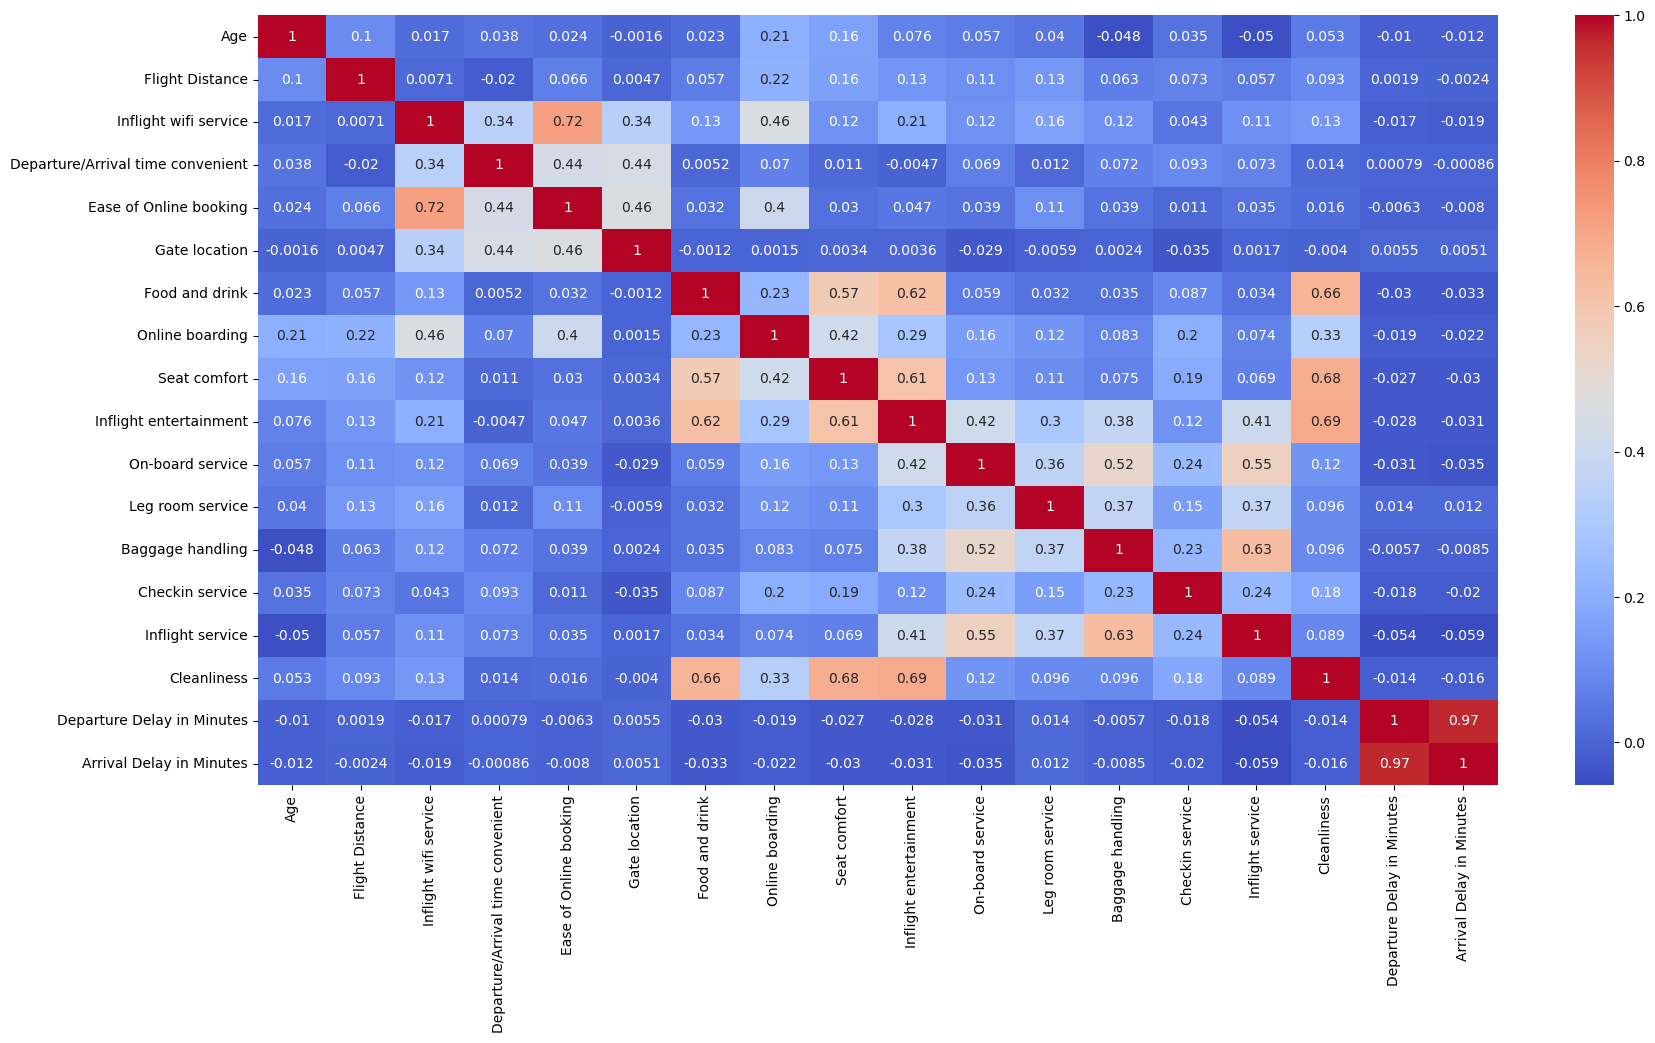

In [800]:
plt.figure(figsize=(20,10))
sns.heatmap(data = corr_matrix , annot = True , cmap = 'coolwarm')
plt.show()

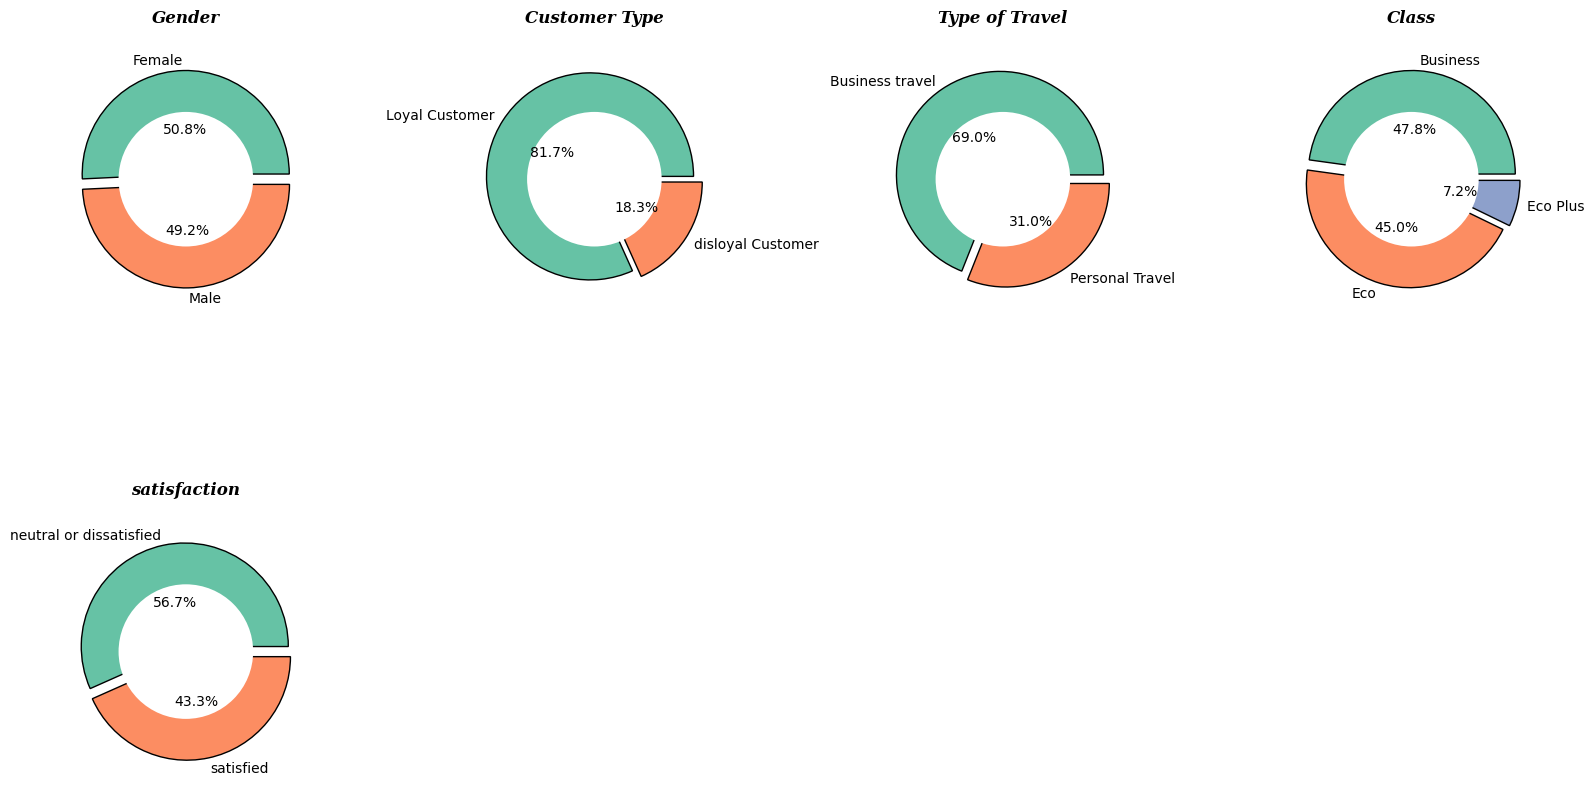

In [801]:
cols = 4
rows = (len(category_col) + cols - 1) // cols
fig, ax = plt.subplots(rows, cols, figsize=(16, 5 * rows))
ax = ax.flatten()

for i, col in enumerate(category_col):
    category_counts = df[col].value_counts()
    
    wedges, texts, autotexts = ax[i].pie(
        category_counts, 
        labels=category_counts.index,
        textprops={'fontsize': 10, 'color': 'black'}, 
        autopct='%1.1f%%',
        colors=sns.color_palette('Set2'),
        explode=[0.05] * len(category_counts),
        wedgeprops={'edgecolor': 'black', 'linewidth': 1}  
    )
    
    
    hole = plt.Circle((0, 0), 0.65, facecolor='white')
    ax[i].add_artist(hole)

    
    for autotext in autotexts:
        autotext.set_color('black')  
        autotext.set_fontsize(10)    
        x, y = autotext.get_position()  
        autotext.set_position((x * 0.75, y * 0.75))  
    
    ax[i].set_title(col, fontsize=12, fontweight='bold', fontstyle='italic', fontfamily='serif', pad=20, color='black')

for i in range(len(category_col), len(ax)):
    fig.delaxes(ax[i])

plt.tight_layout()
plt.show()


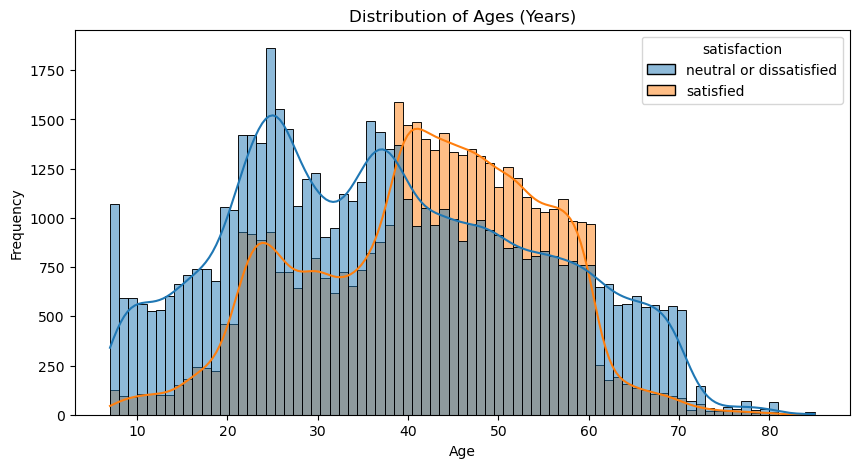

In [802]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='Age', kde=True, hue='satisfaction')
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Distribution of Ages (Years)")
plt.show()

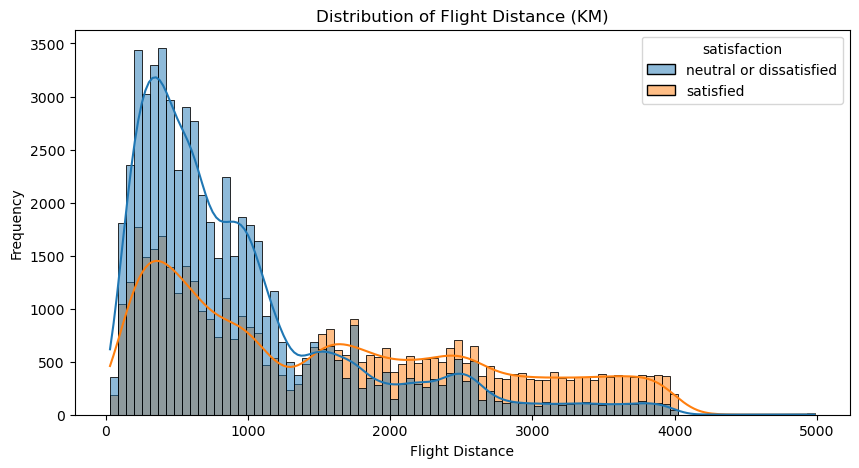

In [803]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='Flight Distance', kde=True, hue='satisfaction')
plt.xlabel("Flight Distance")
plt.ylabel("Frequency")
plt.title("Distribution of Flight Distance (KM)")
plt.show()

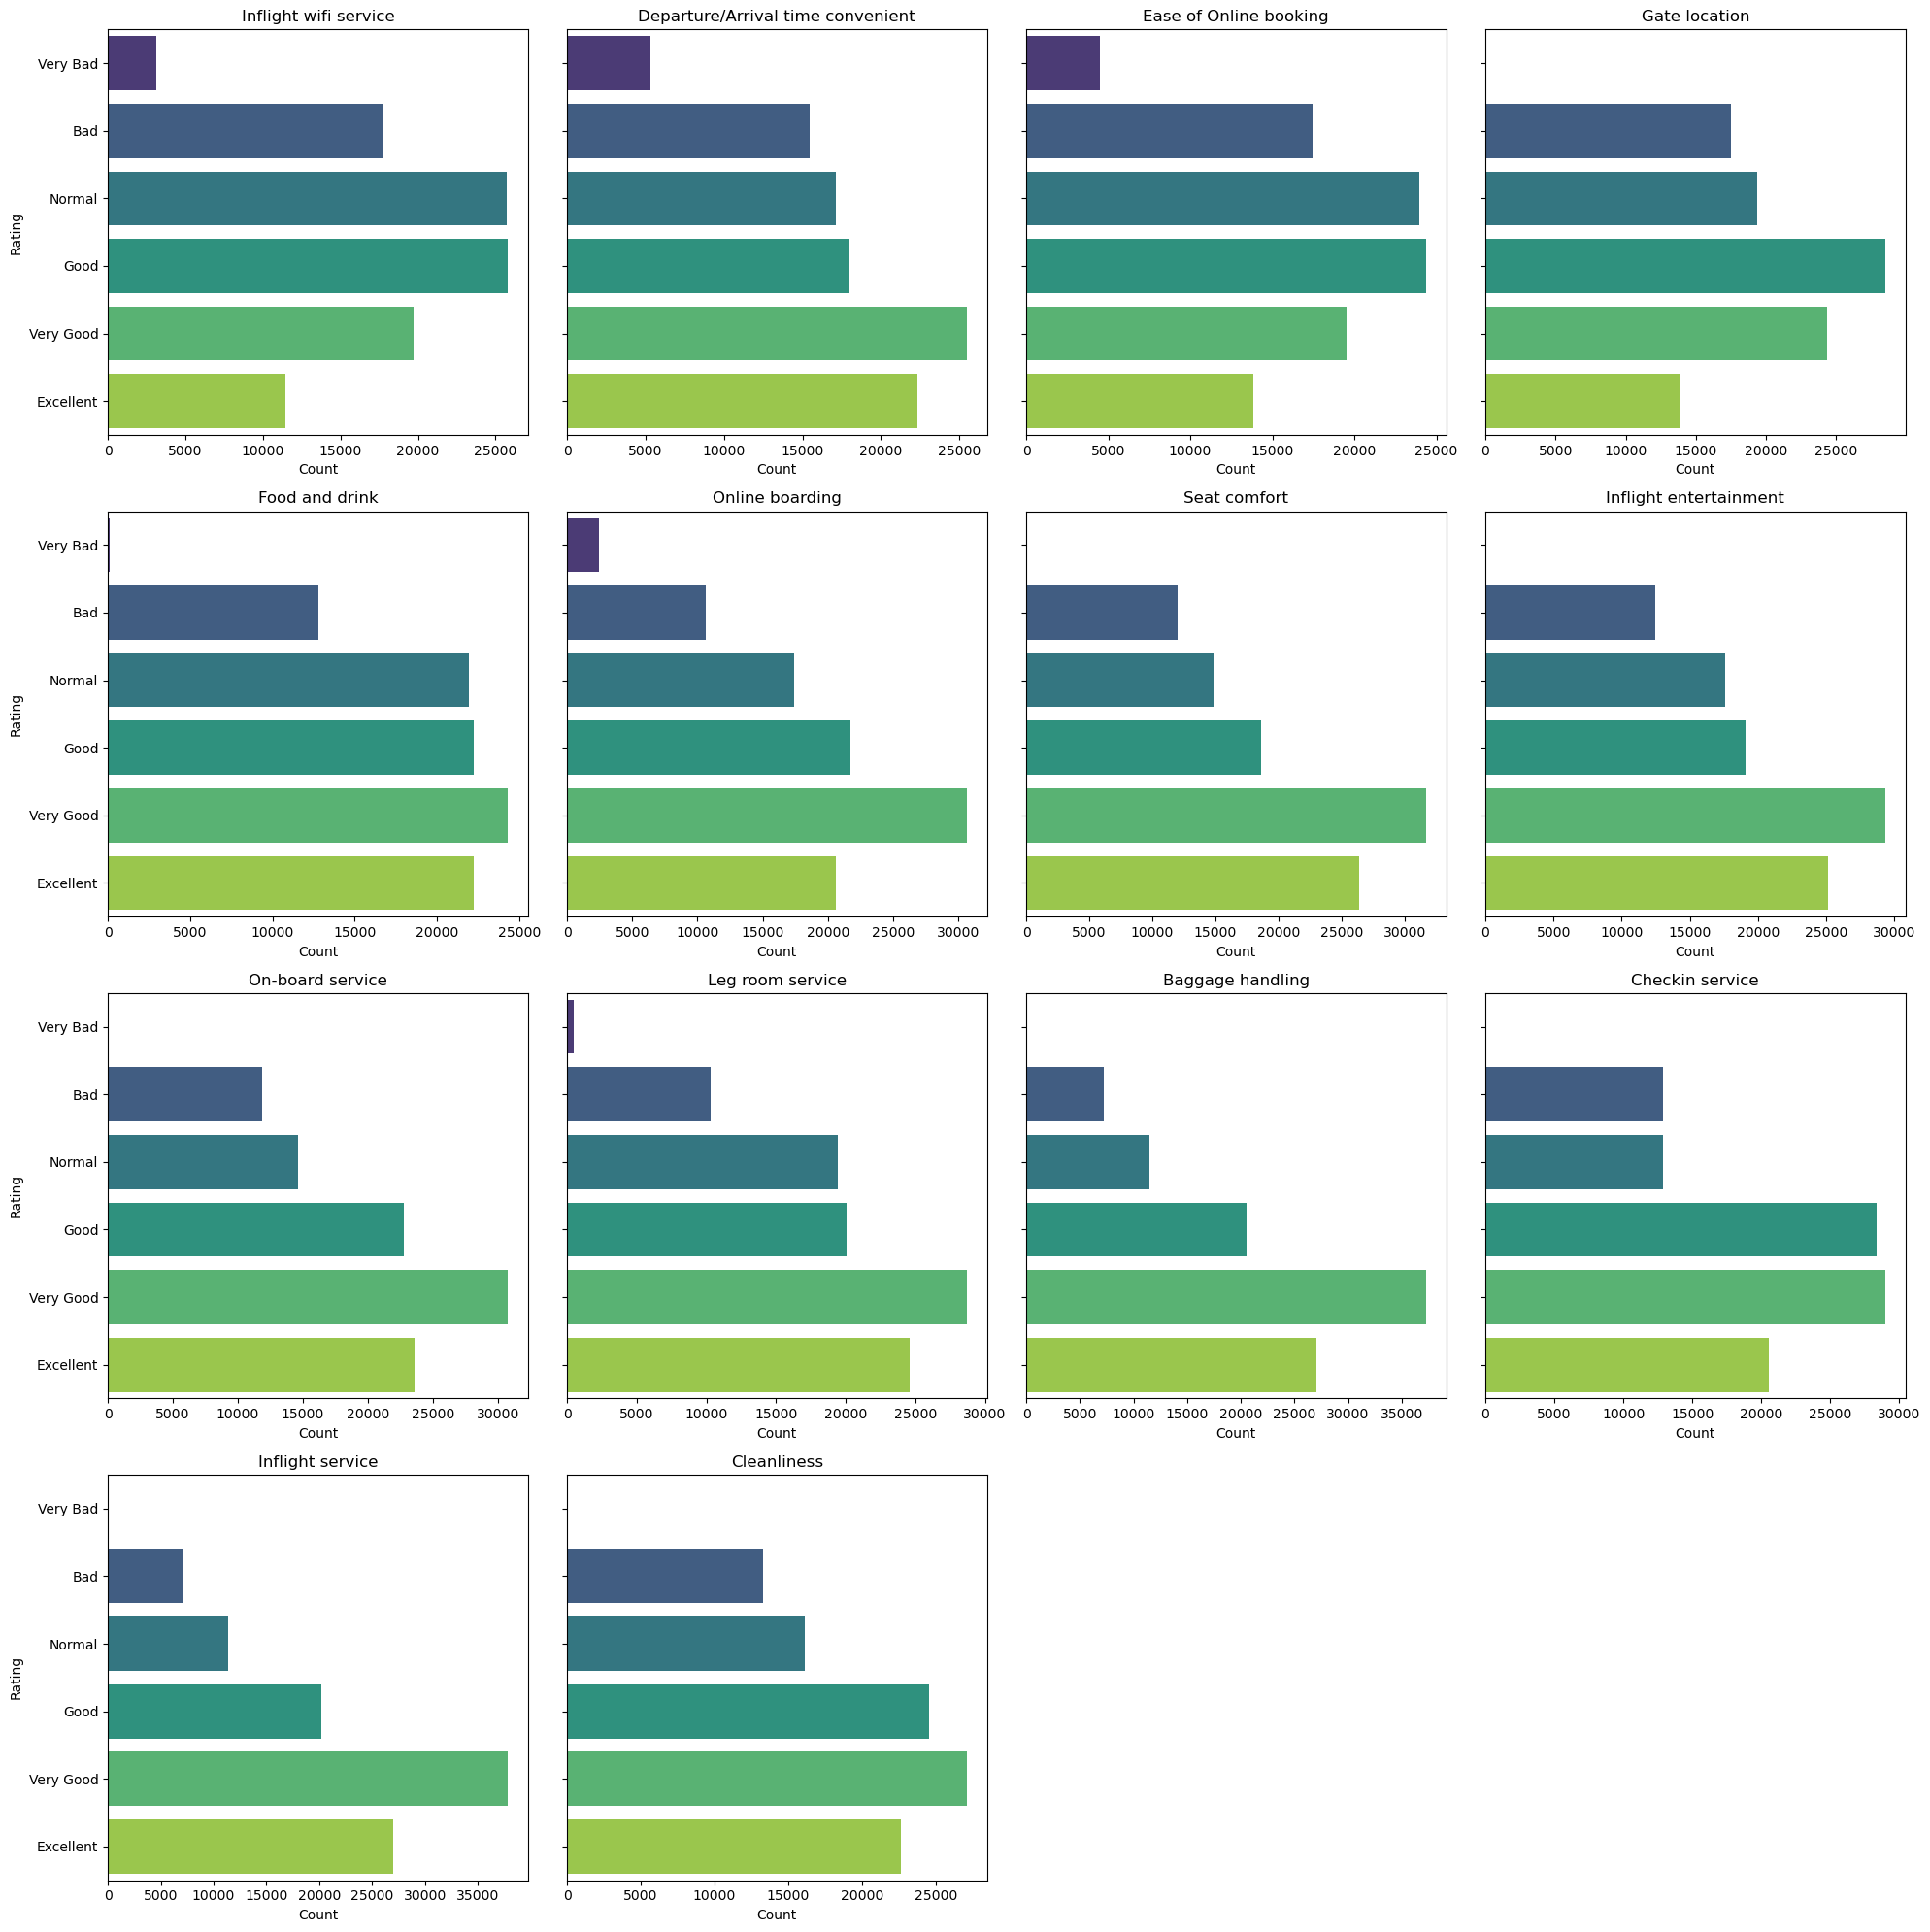

In [804]:
rating_df = df[rating_col].copy()
for col in rating_df.columns:
    rating_df[col] = rating_df[col].map(rating_values)

num_cols = len(rating_df.columns)
cols_per_row = 4  
rows = (num_cols // cols_per_row) + (num_cols % cols_per_row > 0)

fig, axes = plt.subplots(nrows=rows, ncols=cols_per_row, figsize=(20, rows * 5), sharey=True)

axes = axes.flatten()

for i, col in enumerate(rating_df.columns):
    sns.countplot(data=rating_df, y=col, order=list(rating_values.values()), palette='viridis', ax=axes[i])
    axes[i].set_title(col, fontsize=12)
    axes[i].set_xlabel("Count")
    axes[i].set_ylabel("Rating")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

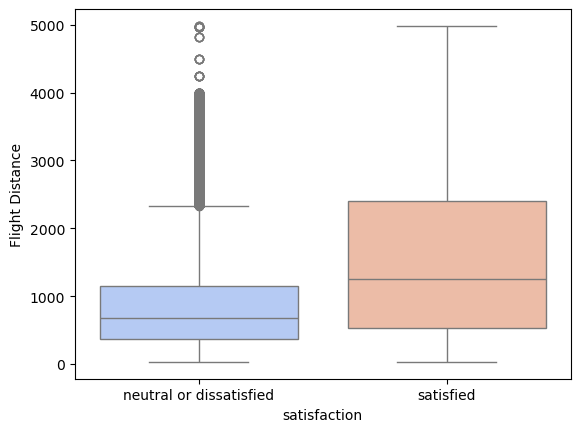

In [805]:
sns.boxplot(data=df, x="satisfaction", y="Flight Distance", palette="coolwarm")
plt.show()

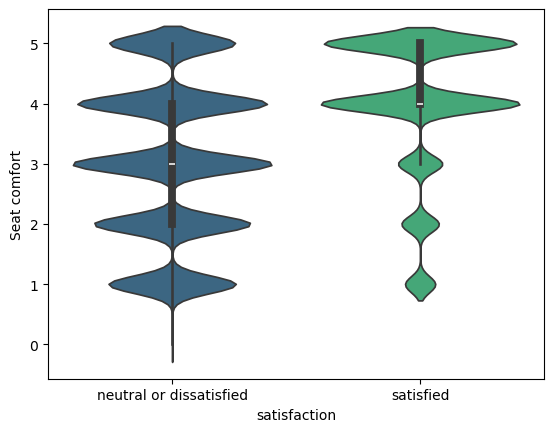

In [806]:
sns.violinplot(data=df, x="satisfaction", y="Seat comfort", palette="viridis")
plt.show()

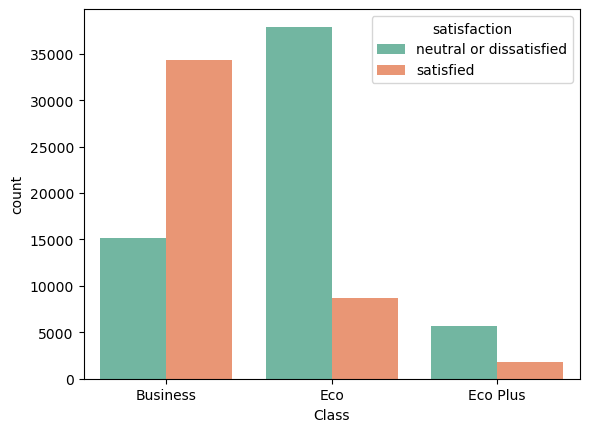

In [807]:
sns.countplot(data=df, x="Class", hue="satisfaction", palette="Set2")
plt.show()

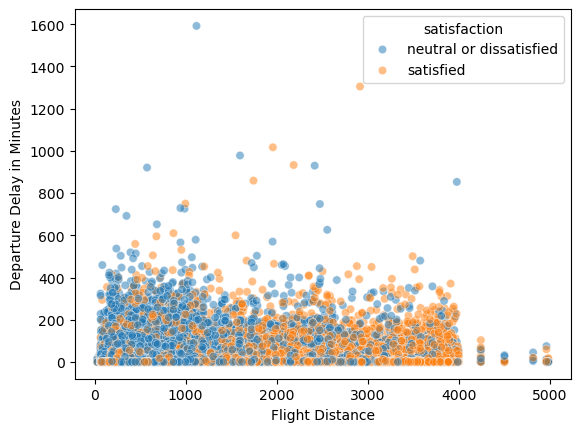

In [808]:
sns.scatterplot(data=df, x="Flight Distance", y="Departure Delay in Minutes", hue="satisfaction", alpha=0.5)
plt.show()